# Importing Data

The data is in three files and it was merged into one dataframe called 'data'. There is also another dataframe for general traffic information. 

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import TimeSeriesSplit

accidents = pd.read_csv('Accidents0515.csv',index_col='Accident_Index')
casualties=pd.read_csv('Casualties0515.csv' , error_bad_lines=False)
vehicles=pd.read_csv('Vehicles0515.csv', error_bad_lines=False)
print(accidents.shape)
#casualties shape
print(casualties.shape)
#vehicles shape
print(vehicles.shape)
traffic = pd.read_csv('ukTrafficAADF.csv')

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



(1780653, 31)
(2216720, 15)
(3004425, 22)


In [16]:
print(accidents.isna().sum())

Location_Easting_OSGR                             138
Location_Northing_OSGR                            138
Longitude                                         138
Latitude                                          138
Police_Force                                        0
Accident_Severity                                   0
Number_of_Vehicles                                  0
Number_of_Casualties                                0
Date                                                0
Day_of_Week                                         0
Time                                              151
Local_Authority_(District)                          0
Local_Authority_(Highway)                           0
1st_Road_Class                                      0
1st_Road_Number                                     0
Road_Type                                           0
Speed_limit                                         0
Junction_Detail                                     0
Junction_Control            

In [19]:
accidents = (accidents[accidents['Time'].isna() != True])
print(accidents.shape)

In [20]:
accidents.drop(['Location_Easting_OSGR', 'Location_Northing_OSGR','LSOA_of_Accident_Location'], axis=1, inplace=True)

In [21]:
print(accidents.shape)

(1780502, 28)


['Unknown' 'Automatic traffic signal' 'Giveway or uncontrolled'
 'Stop Sign' 'Authorised person']


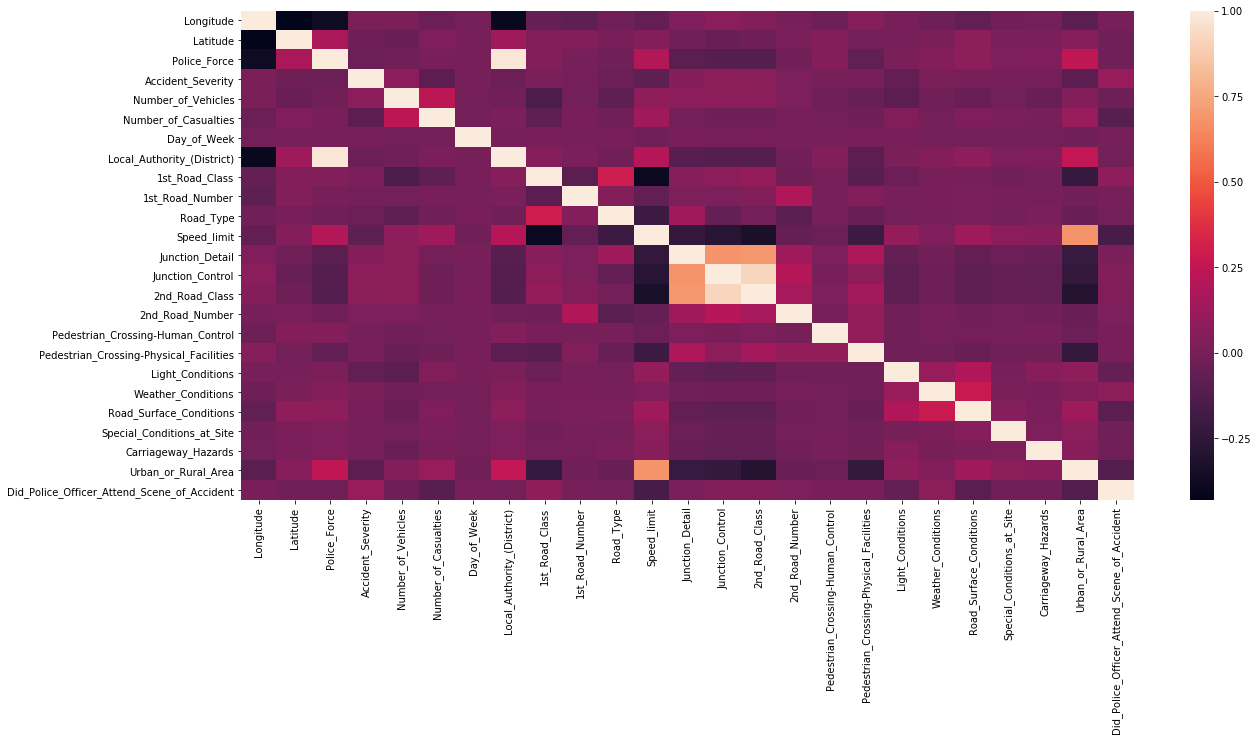

In [22]:
corr =  accidents.corr()
plt.subplots(figsize=(20,9))
sns.heatmap(corr)

In [23]:
accidents.corr()

,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Day_of_Week,Local_Authority_(District),1st_Road_Class,1st_Road_Number,...,2nd_Road_Number,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident
Longitude,1.000000,-0.430281,-0.379166,0.017286,0.019906,-0.037922,-0.002498,-0.399745,-0.057911,-0.079975,...,0.002355,-0.030400,0.055513,0.007404,-0.029158,-0.072339,-0.015124,-0.006879,-0.094575,0.008693
Latitude,-0.430281,1.000000,0.177235,-0.032671,-0.041429,0.030571,0.004012,0.129171,0.034070,0.042219,...,0.014574,0.045845,-0.007251,0.004836,0.020073,0.082378,0.015484,0.012262,0.051328,-0.011332
Police_Force,-0.379166,0.177235,1.000000,-0.036072,-0.016427,0.006264,0.000277,0.981564,0.044015,0.001339,...,-0.018245,0.045233,-0.072140,0.019530,0.047098,0.081599,0.024312,0.028727,0.240340,-0.013622
Accident_Severity,0.017286,-0.032671,-0.036072,1.000000,0.074932,-0.084122,0.002553,-0.036672,0.011914,-0.004703,...,0.025429,0.004790,0.008150,-0.063300,0.021664,0.009447,0.001848,-0.000635,-0.083899,0.115563
Number_of_Vehicles,0.019906,-0.041429,-0.016427,0.074932,1.000000,0.237056,-0.000195,-0.011370,-0.143011,-0.009893,...,0.024148,-0.017132,-0.048588,-0.084349,-0.020935,-0.041632,-0.011094,-0.045290,0.040454,-0.032010
Number_of_Casualties,-0.037922,0.030571,0.006264,-0.084122,0.237056,1.000000,-0.000940,0.013582,-0.082935,0.007093,...,0.001278,-0.007911,-0.028037,0.036752,-0.004537,0.028240,0.012382,0.003279,0.115783,-0.105511
Day_of_Week,-0.002498,0.004012,0.000277,0.002553,-0.000195,-0.000940,1.000000,0.000187,0.007202,0.002456,...,0.000452,0.000630,0.007072,0.007994,-0.001594,-0.011015,-0.003157,-0.003728,-0.016725,0.004022
Local_Authority_(District),-0.399745,0.129171,0.981564,-0.036672,-0.011370,0.013582,0.000187,1.000000,0.055189,0.011973,...,-0.016556,0.040577,-0.084203,0.017918,0.049595,0.081099,0.024776,0.028432,0.253338,-0.009921
1st_Road_Class,-0.057911,0.034070,0.044015,0.011914,-0.143011,-0.082935,0.007202,0.055189,1.000000,-0.088225,...,-0.033543,0.006966,-0.095735,-0.038116,0.011054,0.001614,-0.015393,-0.005042,-0.227499,0.084933
1st_Road_Number,-0.079975,0.042219,0.001339,-0.004703,-0.009893,0.007093,0.002456,0.011973,-0.088225,1.000000,...,0.185178,0.002428,0.038506,0.002643,0.010752,0.014917,0.000101,-0.001781,-0.015447,0.003423


Splitting the data as 80% for training and 20% for testing


In [30]:
rows = accidents.shape[0]
rows =  int(rows*0.8)
train_data = accidents[:rows]
test_data = accidents[rows:]

# Data Visualization

Text(0.5,1,'Accidents on the day of the week')

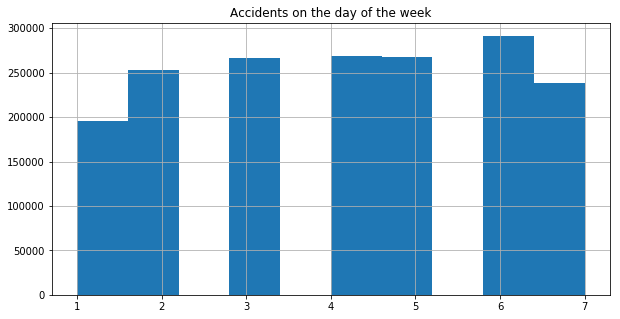

In [29]:
plt.subplots(figsize=(10,5))
accidents.Day_of_Week.hist()
plt.title('Accidents on the day of the week')